# UB CSE 712 Week 9 Assignment
---

## Assignment details

In this assignment, you are asked to create and run five circuits in each of Qiskit and Cirq. I have created sections
for you to put your code, along with the necessary Python imports. I expect you to develop this in Visual Studio Code
and submit the .ipynb file with your name in the title of the file. You should run your code in the simulator defined below
for each development kit.

Documentation on Jupyter in Visual Studio Code: https://code.visualstudio.com/docs/datascience/jupyter-notebooks

Once you have run the script once, you may want to comment out the lines that start with ``%pip`` by placing ``#`` followed by a space at the beginning of the line.

For each circuit,
* Define the circuit object for the appropriate number of qubits.
* Place the gates and measurements on each line for each qubit.
* Print or draw the circuit.
* Run the circuit for 500 repetitions in the defined simulator. Repetitions are also called *shots*.
* Show the histogram of the result. 
* Show the histogram again with the bars shown in red.

### Circuit 1

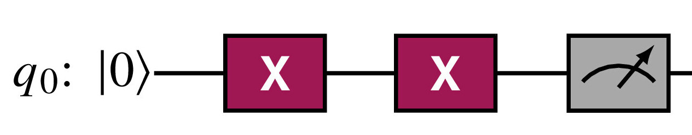

### Circuit 2

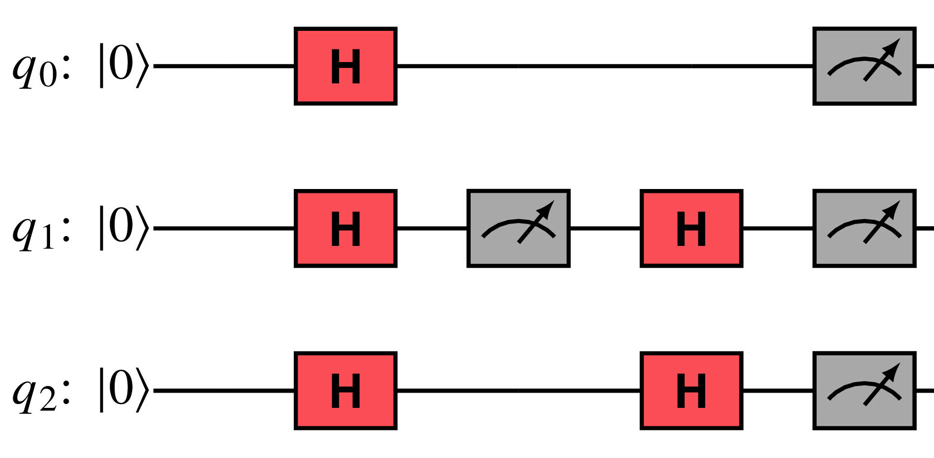

### Circuit 3

In this circuit, initialize the top qubit to |0⟩ and the bottom to |1⟩. Add measurements at the end.

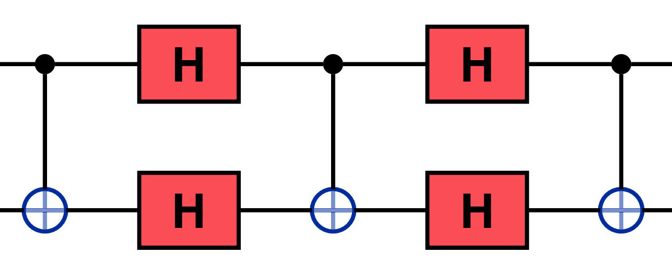

### Circuit 4

In this circuit, you do not write code for **U**<sub>*f*</sub> and **U**<sub>*&phi;*</sub> nor the yellow boxes, just the gates and measurements.

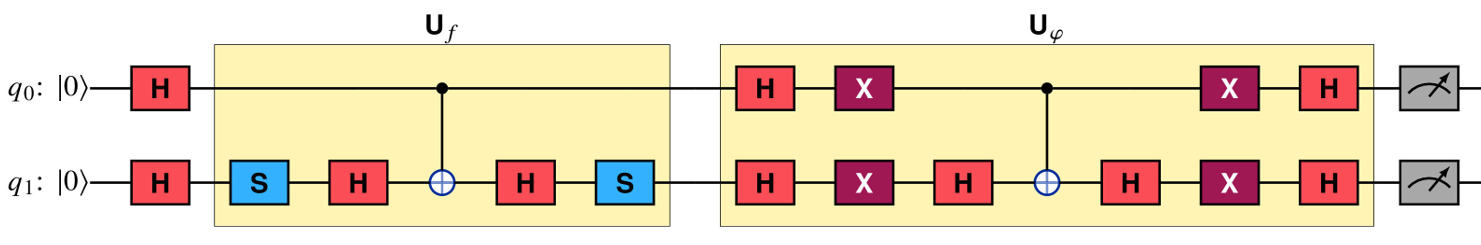

### Circuit 5

In this circuit, initialize the qubits to |0⟩ and add measurements at the end.

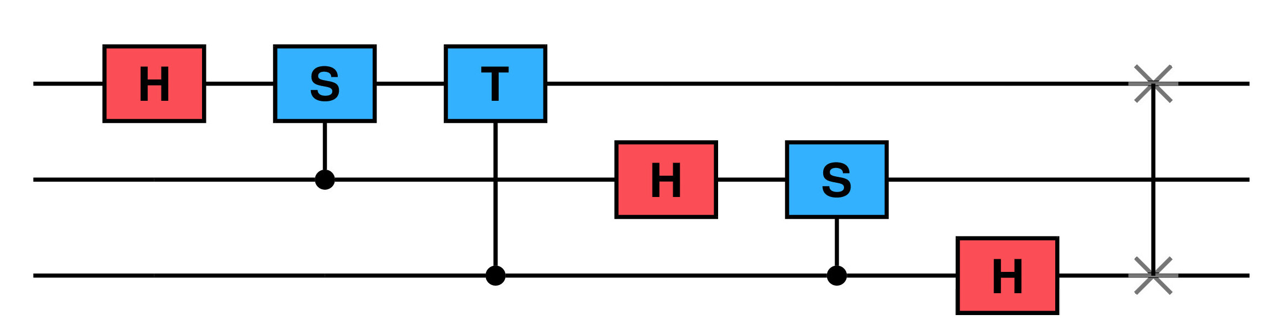

---
## Qiskit

#### Documentation

* https://qiskit.org/documentation/tutorials.html
* https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html
* https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

#### Import the necessary libraries

In [ ]:
#%pip install qiskit pylatexenc --quiet

In [1]:
from math import *
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
draw_kwargs = {
    "output": "mpl",         # use matplotlib
    "cregbundle": False,     # separate classical register wires
    "initial_state": True,   # show |0> and 0
    "idle_wires": False,     # don't show unused wires
    "plot_barriers" :False   # don't show inserted barriers
}

Example Qiskit code to draw a circuit: ``circuit.draw(**draw_kwargs)``

#### Define the simulator

In [3]:
simulator = Aer.get_backend("statevector_simulator")

### Circuit 1 in Qiskit

Insert code starting on the following line

Circuit #1 by Qiskit:



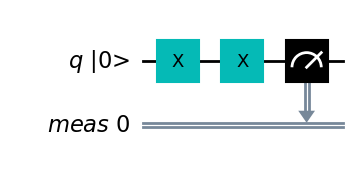

In [4]:
circuit1v1 = QuantumCircuit(1)
circuit1v1.x(0)
circuit1v1.x(0)
circuit1v1.measure_all()
print("Circuit #1 by Qiskit:\n")
circuit1v1.draw(**draw_kwargs)

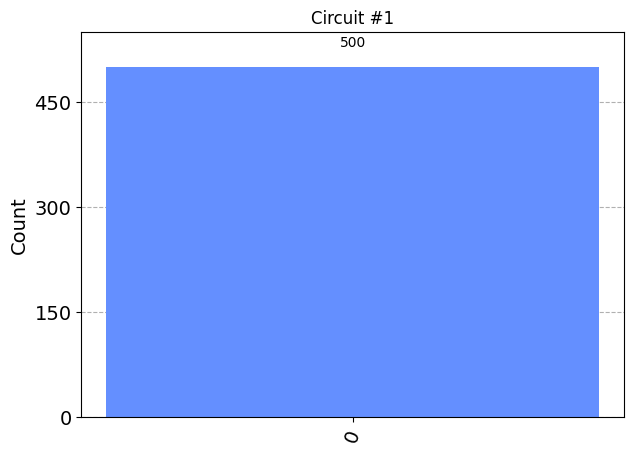

In [5]:
result1 = execute(circuit1v1, simulator, shots=500).result()
counts1 = result1.get_counts(circuit1v1)
plot_histogram(counts1, title="Circuit #1")

In [6]:
# Showing the bars in red

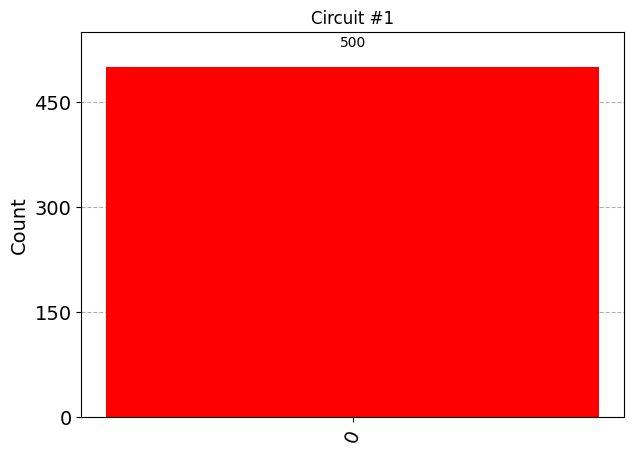

In [7]:
plot_histogram(counts1, color='red', title="Circuit #1")

In [8]:
# second method: showing the output on the bloch sphere

Circuit #1 by Qiskit without measurement:



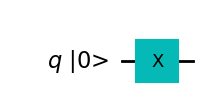

In [11]:
circuit1v2 = QuantumCircuit(1)
circuit1v2.x(0)
#circuit1v2.x(0)
print("Circuit #1 by Qiskit without measurement:\n")
circuit1v2.draw(**draw_kwargs)

The result state vector is: [0.+0.j 1.+0.j]


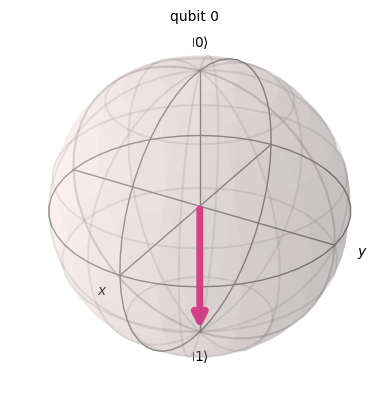

In [12]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

statevec1 = Statevector.from_instruction(circuit1v2).data
print("The result state vector is:", statevec1)
plot_bloch_multivector(statevec1)

In [ ]:
#Third method: showing the operation of circuit in the matrix form

In [13]:
simulator2 = Aer.get_backend("unitary_simulator")
result3 = execute(circuit1v2, simulator2).result()
unitary = result3.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


### Circuit 2 in Qiskit

Insert code starting on the following line

Circuit #2 by Qiskit:



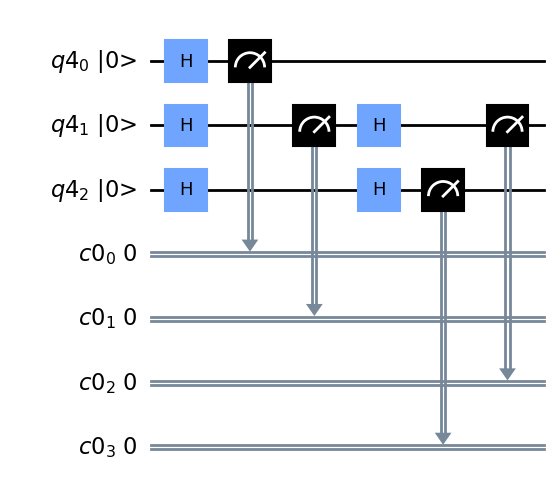

In [14]:
qr2 = QuantumRegister(3)
cr2 = ClassicalRegister(4)
circuit2v1 = QuantumCircuit(qr2, cr2)
for i in range (3):
    circuit2v1.h(i)
circuit2v1.measure(qr2[0],cr2[0])
circuit2v1.measure(qr2[1],cr2[1])

circuit2v1.h(1)

circuit2v1.measure(qr2[1],cr2[2])
circuit2v1.h(2)
circuit2v1.measure(qr2[2],cr2[3])

print("Circuit #2 by Qiskit:\n")
circuit2v1.draw(**draw_kwargs)


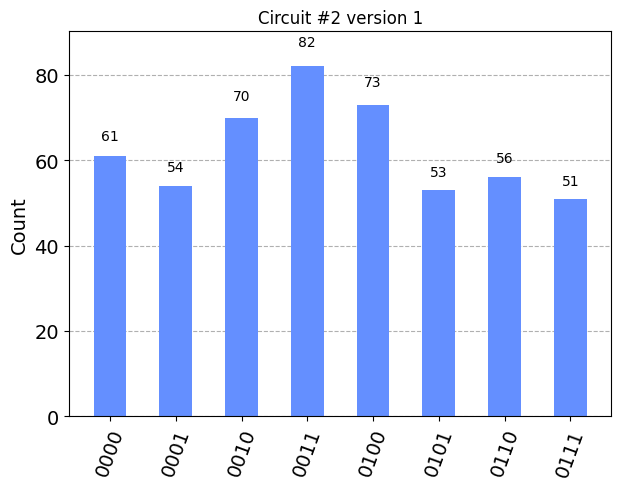

In [15]:
result2 = execute(circuit2v1, simulator, shots=500).result()
counts2 = result2.get_counts(circuit2v1)
plot_histogram(counts2, title="Circuit #2 version 1")

In [16]:
# Showing the bars in red

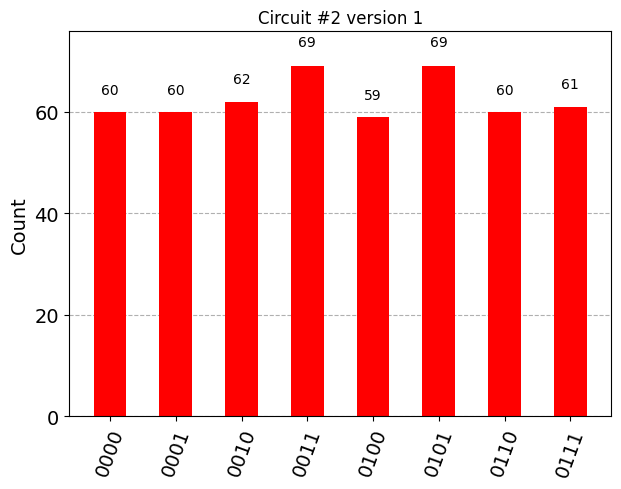

In [17]:
result2 = execute(circuit2v1, simulator, shots=500).result()
counts2 = result2.get_counts(circuit2v1)
plot_histogram(counts2, color= 'red', title="Circuit #2 version 1")

In [18]:
# A new 3-input circuit just to show its output on 3D q-sphere 

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


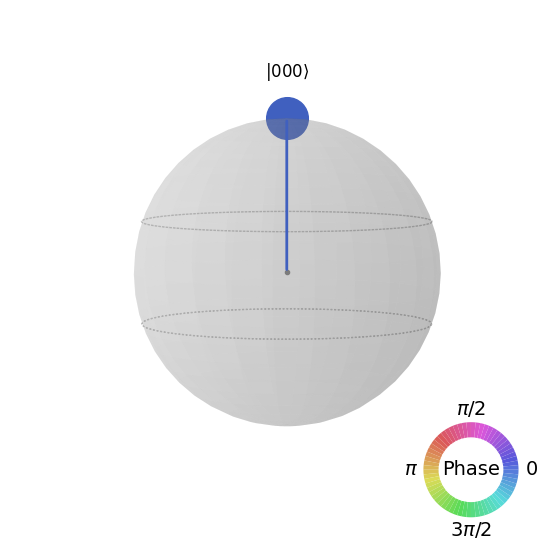

In [19]:
from qiskit.tools.visualization import plot_state_qsphere
statevec2 = Statevector.from_label('000')
print(statevec2)
plot_state_qsphere(statevec2)

Circuit with three Hadamard gates by Qiskit:



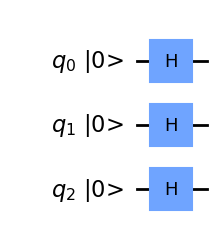

In [20]:
circuit2v2 = QuantumCircuit(3)
for i in range (3):
    circuit2v2.h(i)

print("Circuit with three Hadamard gates by Qiskit:\n")
circuit2v2.draw(**draw_kwargs)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


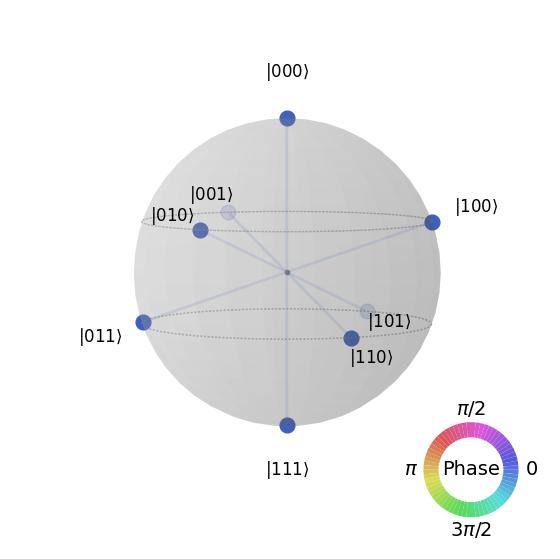

In [21]:
new_statevec2 = Statevector.from_instruction(circuit2v2).data
print(new_statevec2)
plot_state_qsphere(new_statevec2)

### Circuit 3 in Qiskit

Insert code starting on the following line

Circuit #3 by Qiskit:



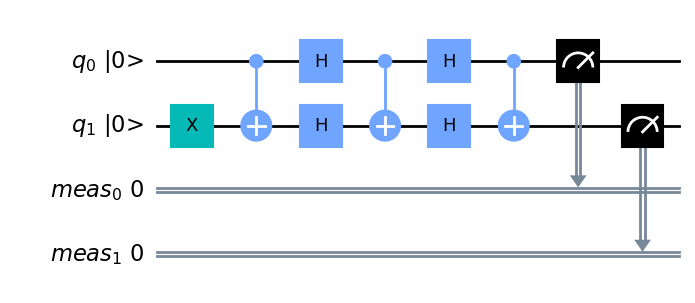

In [22]:
circuit3v1 = QuantumCircuit(2)
circuit3v1.x(1)
circuit3v1.cx(0,1)
circuit3v1.h(0)
circuit3v1.h(1)
circuit3v1.cx(0,1)
circuit3v1.h(0)
circuit3v1.h(1)
circuit3v1.cx(0,1)
circuit3v1.measure_all()

print("Circuit #3 by Qiskit:\n")
circuit3v1.draw(**draw_kwargs)


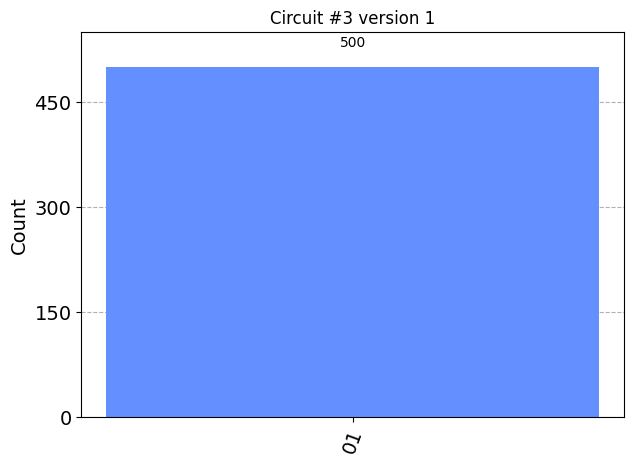

In [23]:
result3 = execute(circuit3v1, simulator, shots=500).result()
counts3 = result3.get_counts(circuit3v1)
plot_histogram(counts3, title="Circuit #3 version 1")

In [24]:
# Showing the bars in red

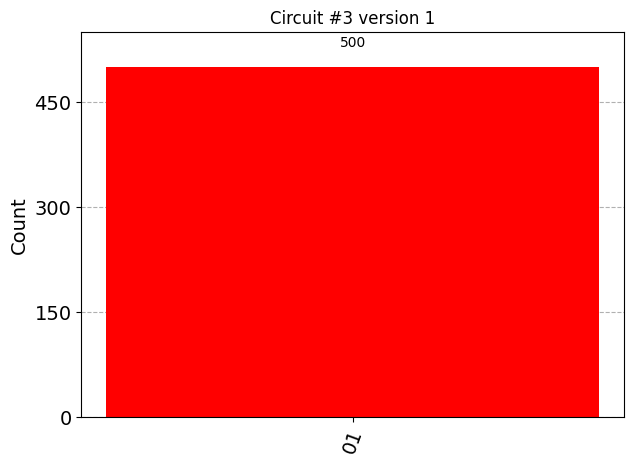

In [25]:
result3 = execute(circuit3v1, simulator, shots=500).result()
counts3 = result3.get_counts(circuit3v1)
plot_histogram(counts3, color= 'red', title="Circuit #3 version 1")

In [26]:
#Using the statevector for defining a specific input vector

The input of the circut is: Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


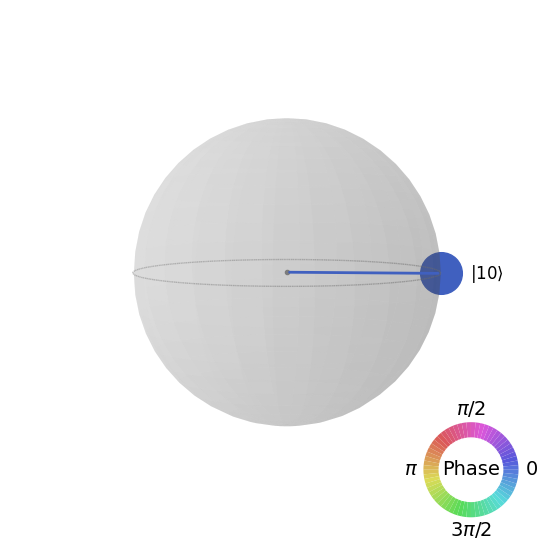

In [27]:
statevec3 = Statevector.from_label('10')
print("The input of the circut is:" , statevec3)
plot_state_qsphere(statevec3)

In [28]:
# Showing the circuit #3's output on q-sphere

Statevector([5.97792087e-34+0.j, 1.00000000e+00+0.j, 3.25176795e-17+0.j,
             6.22328532e-19+0.j],
            dims=(2, 2))


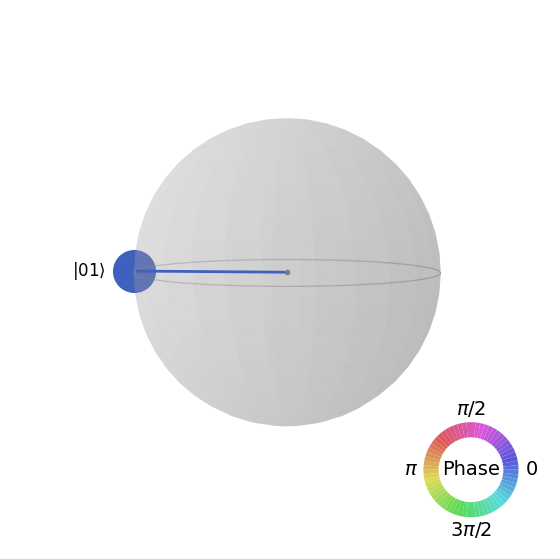

In [29]:
circuit3v2 = QuantumCircuit(2)
circuit3v2.cx(0,1)
circuit3v2.h(0)
circuit3v2.h(1)
circuit3v2.cx(0,1)
circuit3v2.h(0)
circuit3v2.h(1)
circuit3v2.cx(0,1)
circuit3v2.draw(**draw_kwargs)
new_statevec3 = statevec3.evolve(circuit3v2)
print(new_statevec3)

plot_state_qsphere(new_statevec3)

### Circuit 4 in Qiskit

Insert code starting on the following line

Circuit #4 by Qiskit:



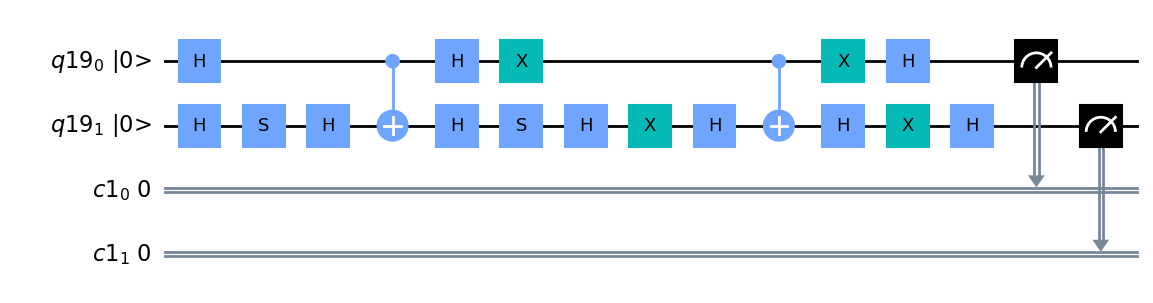

In [30]:
qr4 = QuantumRegister(2)
cr4 = ClassicalRegister(2)
circuit4v1 = QuantumCircuit(qr4, cr4)
circuit4v1.h(0)
circuit4v1.h(1)
circuit4v1.s(1)
circuit4v1.h(1)
circuit4v1.cx(0,1)
circuit4v1.h(1)
circuit4v1.s(1)
circuit4v1.h(0)
circuit4v1.h(1)
circuit4v1.x(0)
circuit4v1.x(1)
circuit4v1.h(1)
circuit4v1.cx(0,1)
circuit4v1.h(1)
circuit4v1.x(0)
circuit4v1.x(1)
circuit4v1.h(0)
circuit4v1.h(1)
circuit4v1.measure(qr4,cr4)

print("Circuit #4 by Qiskit:\n")
circuit4v1.draw(**draw_kwargs)

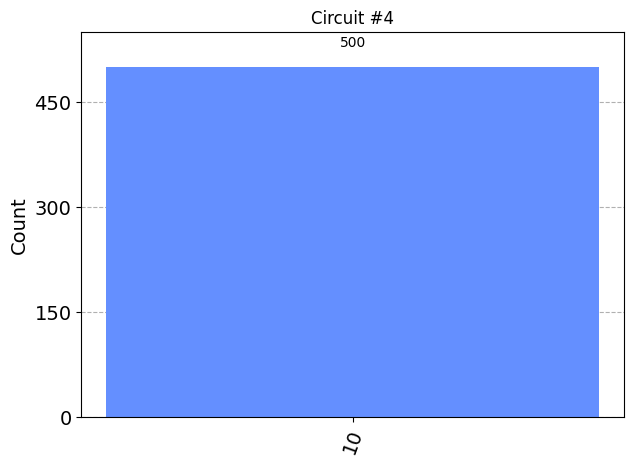

In [31]:
result4 = execute(circuit4v1, simulator, shots=500).result()
counts4 = result4.get_counts(circuit4v1)
plot_histogram(counts4, title="Circuit #4")

In [32]:
# Showing the bars in red

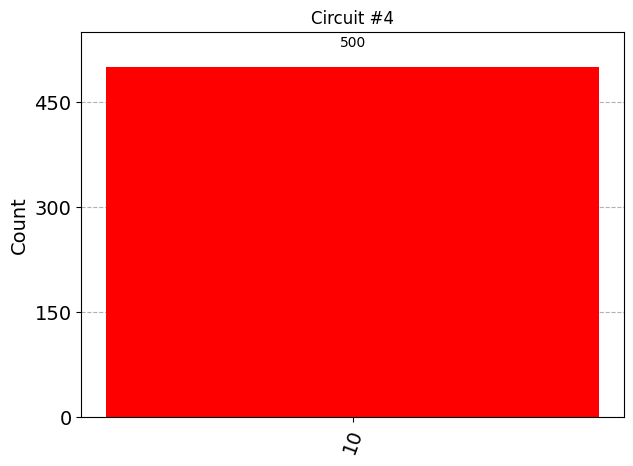

In [33]:
result4 = execute(circuit4v1, simulator, shots=500).result()
counts4 = result4.get_counts(circuit4v1)
plot_histogram(counts4, color="red", title="Circuit #4")

### Circuit 5 in Qiskit

Insert code starting on the following line

Circuit #5 by Qiskit:



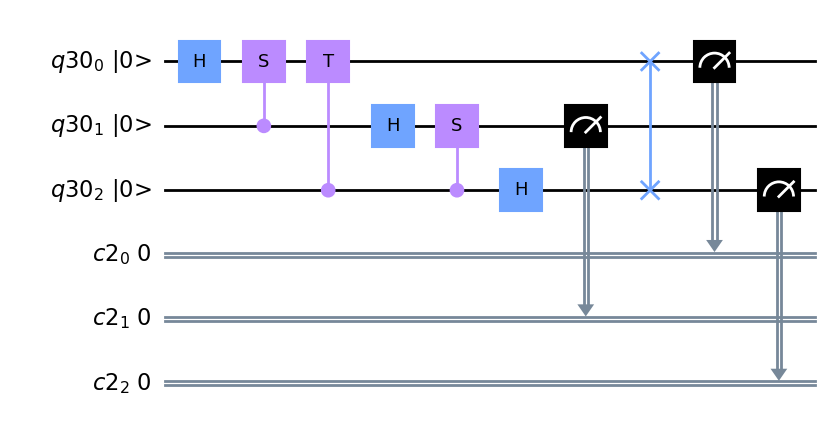

In [34]:
from qiskit.circuit.library.standard_gates import SGate, TGate

qr5 = QuantumRegister(3)
cr5 = ClassicalRegister(3)
circuit5v1 = QuantumCircuit(qr5, cr5)

csgate = SGate().control(1) 
ctgate = TGate().control(1)

circuit5v1.h(0)
circuit5v1.append(csgate, [1, 0])
circuit5v1.append(ctgate, [2, 0])
circuit5v1.h(1)
circuit5v1.append(csgate, [2, 1])
circuit5v1.h(2)
circuit5v1.swap(0,2)

circuit5v1.measure(qr5,cr5)

print("Circuit #5 by Qiskit:\n")
circuit5v1.draw(**draw_kwargs)

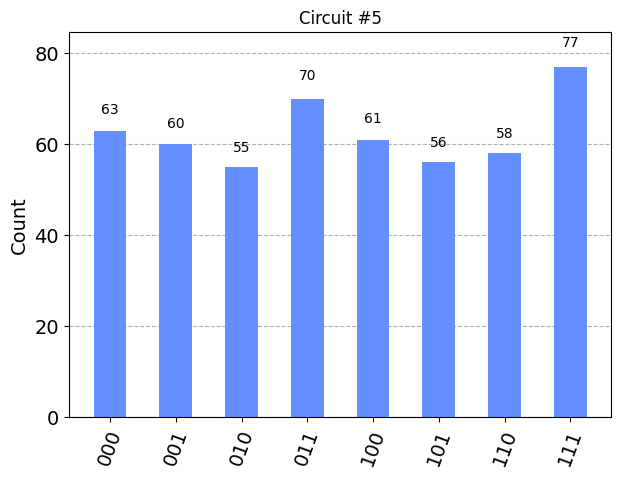

In [35]:
result5 = execute(circuit5v1, simulator, shots=500).result()
counts5 = result5.get_counts(circuit5v1)
plot_histogram(counts5, title="Circuit #5")

In [36]:
simulator21 = Aer.get_backend("unitary_simulator")
qr5 = QuantumRegister(3)
cr5 = ClassicalRegister(3)
circuit5v1 = QuantumCircuit(qr5, cr5)

csgate = SGate().control(1) 
ctgate = TGate().control(1)

circuit5v1.h(0)
circuit5v1.append(csgate, [1, 0])
circuit5v1.append(ctgate, [2, 0])
circuit5v1.h(1)
circuit5v1.append(csgate, [2, 1])
circuit5v1.h(2)
circuit5v1.swap(0,2)

result31 = execute(circuit5v1, simulator21).result()
unitary = result31.get_unitary()
print(unitary)

Operator([[ 3.53553391e-01+0.00000000e+00j,
            3.53553391e-01-4.32978028e-17j,
            3.53553391e-01-7.10533784e-17j,
            3.53553391e-01-7.10533784e-17j,
            3.53553391e-01-6.74660361e-17j,
            3.53553391e-01-1.14847767e-16j,
            3.53553391e-01-1.25389768e-16j,
            3.53553391e-01-1.25389768e-16j],
          [ 3.53553391e-01+0.00000000e+00j,
            3.53553391e-01-4.32978028e-17j,
            3.53553391e-01-7.10533784e-17j,
            3.53553391e-01-7.10533784e-17j,
           -3.53553391e-01+6.74660361e-17j,
           -3.53553391e-01+1.14847767e-16j,
           -3.53553391e-01+1.25389768e-16j,
           -3.53553391e-01+1.25389768e-16j],
          [ 3.53553391e-01+0.00000000e+00j,
            3.53553391e-01-4.32978028e-17j,
           -3.53553391e-01+7.10533784e-17j,
           -3.53553391e-01+7.10533784e-17j,
            8.00307824e-17+3.53553391e-01j,
            1.07786358e-16+3.53553391e-01j,
           -1.16870513e-16-3.5

In [37]:
# Showing the bars in red

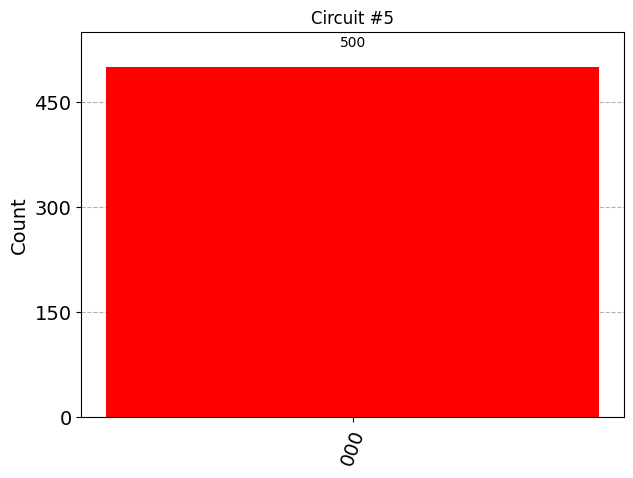

In [38]:
result5 = execute(circuit5v1, simulator, shots=500).result()
counts5 = result5.get_counts(circuit5v1)
plot_histogram(counts5, color="red", title="Circuit #5")

---
## Cirq

#### Documentation

* https://quantumai.google/cirq/start/intro
* https://quantumai.google/cirq/start/basics

#### Import the necessary libraries

Reset to keep Qiskit and Cirq namespaces separate

In [39]:
%reset -f

In [40]:
#%pip install cirq matplotlib numpy --quiet

In [41]:
import cirq
import matplotlib.pyplot as plt
import numpy as np

Test the import.

In [42]:
import cirq_google
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

#### Define the simulator

In [43]:
simulator = cirq.Simulator()

### Circuit 1 in Cirq

Insert code starting on the following line

In [44]:
circuit1 = cirq.Circuit()
qubits1 = cirq.LineQubit.range(1)

circuit1.append(cirq.X(qubits1[0]))
circuit1.append(cirq.X(qubits1[0]))
circuit1.append(cirq.measure(qubits1[0]))

print("Circuit #1 in Cirq:\n")
print(circuit1)


Circuit #1 in Cirq:

0: ───X───X───M───


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

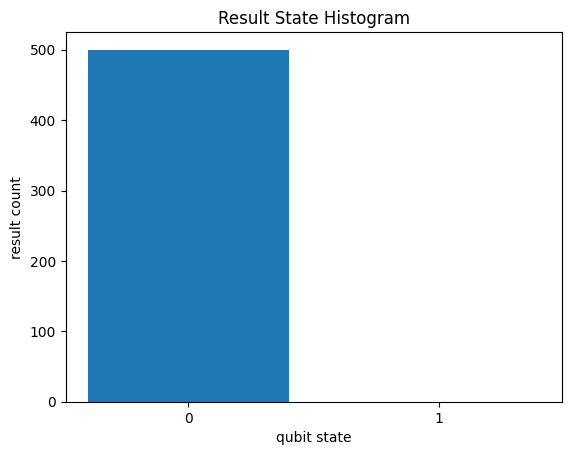

In [45]:
result1 = simulator.run(circuit1, repetitions=500)
cirq.plot_state_histogram(result1)

In [46]:
#showing only the non-zero outputs

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Circuit #1'}, xlabel='Measurement Outcome', ylabel='result count'>

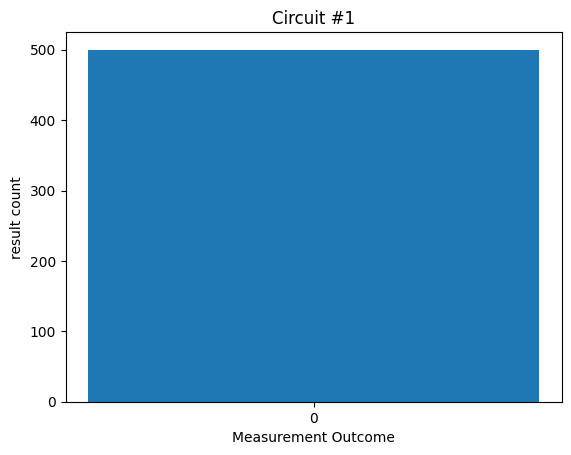

In [47]:
q = cirq.LineQubit.range(1)

circuit1v1 = cirq.Circuit([cirq.X(q[0]), [cirq.X(q[0])], cirq.measure(*q, key='measure_all')])

result1 = simulator.run(circuit1v1, repetitions=500)
nonzeros = result1.histogram(key = 'measure_all')
cirq.plot_state_histogram(nonzeros, xlabel='Measurement Outcome', title="Circuit #1")


### Circuit 2 in Cirq

Insert code starting on the following line

In [48]:
qubits2 = cirq.LineQubit.range(3)

circuit2 = cirq.Circuit(
    cirq.H(qubits2[0]),
    cirq.measure(qubits2[0], key='a'), 

    cirq.H(qubits2[1]),
    cirq.measure(qubits2[1], key='b'),
    cirq.H(qubits2[1]),
    cirq.measure(qubits2[1], key='c'), 

    cirq.H(qubits2[2]),
    cirq.H(qubits2[2]),
    cirq.measure(qubits2[2], key='d'),
)

print("Circuit #2 by Cirq:\n")
print(circuit2)

Circuit #2 by Cirq:

0: ───H───M('a')─────────────────────

1: ───H───M('b')───H────────M('c')───

2: ───H───H────────M('d')────────────


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

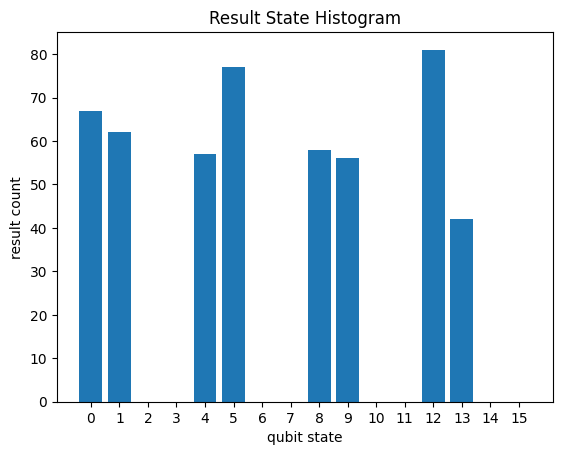

In [49]:
result2 = simulator.run(circuit2, repetitions=500)
cirq.plot_state_histogram(result2)

In [50]:
# Converting the X-axis values to binary, changing the title and x-label, and changing the size to better visualization

In [51]:
# A function for convering values of X-axis to binary format

In [52]:
def get_binary_list(num_digits):
    return[format (x,"b").zfill(num_digits) for x in range(2**num_digits)]

In [53]:
get_binary_list(3)

['000', '001', '010', '011', '100', '101', '110', '111']

<Axes: title={'center': 'Circuit #2'}, xlabel='Measurement Outcome', ylabel='result count'>

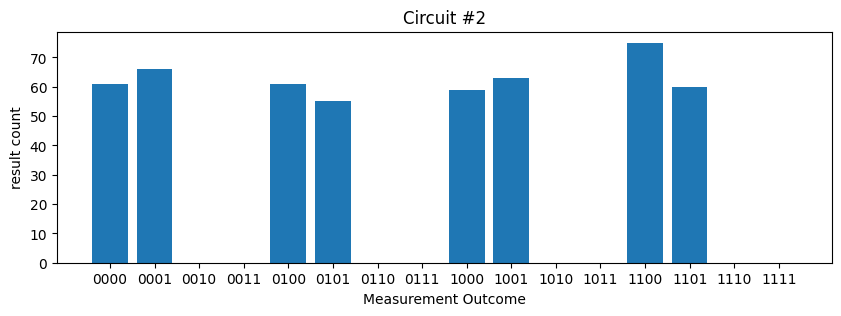

In [56]:
result2 = simulator.run(circuit2, repetitions=500)
mfig, myaxis = plt.subplots(figsize=(10, 3), nrows=1,ncols=1)
cirq.plot_state_histogram(result2, tick_label=get_binary_list(4), xlabel='Measurement Outcome', title="Circuit #2", ax=myaxis)

In [57]:
# The output is similar to Qiskit's output but there is a permutation in the outputs.

### Circuit 3 in Cirq

Insert code starting on the following line

In [58]:
circuit3 = cirq.Circuit()
qubits3 = cirq.LineQubit.range(2)

circuit3.append(cirq.X(qubits3[1]))
circuit3.append(cirq.CX(qubits3[0],qubits3[1]))
circuit3.append(cirq.H(qubits3[0]))
circuit3.append(cirq.H(qubits3[1]))
circuit3.append(cirq.CX(qubits3[0],qubits3[1]))
circuit3.append(cirq.H(qubits3[0]))
circuit3.append(cirq.H(qubits3[1]))
circuit3.append(cirq.CX(qubits3[0],qubits3[1]))


circuit3.append(cirq.measure(qubits) for qubits in qubits3)


print("Circuit #3 by Cirq:\n")
print(circuit3)

Circuit #3 by Cirq:

0: ───────@───H───@───H───@───M───
          │       │       │
1: ───X───X───H───X───H───X───M───


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

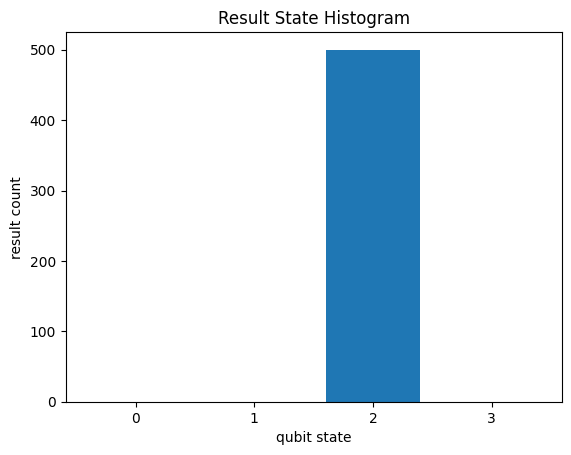

In [59]:
result3 = simulator.run(circuit3, repetitions=500)
cirq.plot_state_histogram(result3)

In [60]:
# Converting the X-axis values to binary and changing the title and x-label

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Circuit #3'}, xlabel='Measurement Outcome', ylabel='result count'>

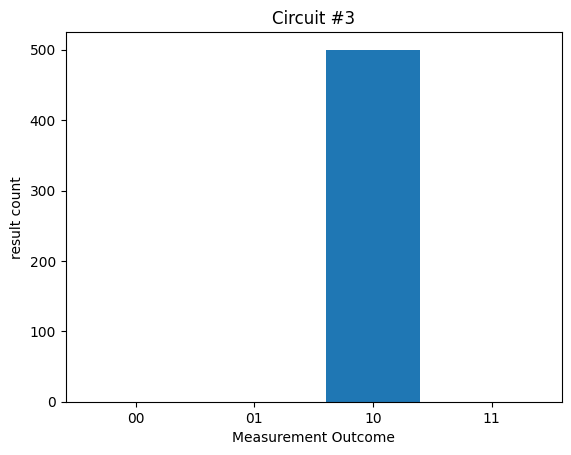

In [61]:
result3 = simulator.run(circuit3, repetitions=500)
cirq.plot_state_histogram(result3, tick_label=get_binary_list(2), xlabel='Measurement Outcome', title="Circuit #3")

### Circuit 4 in Cirq

Insert code starting on the following line

In [62]:
qubits4 = cirq.LineQubit.range(2)
circuit4 = cirq.Circuit(cirq.H.on_each(qubits4))

circuit4.append(cirq.S(qubits4[1]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.CX(qubits4[0],qubits4[1]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.S(qubits4[1]))
circuit4.append(cirq.H(qubits4[0]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.X(qubits4[0]))
circuit4.append(cirq.X(qubits4[1]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.CX(qubits4[0],qubits4[1]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.X(qubits4[0]))
circuit4.append(cirq.X(qubits4[1]))
circuit4.append(cirq.H(qubits4[0]))
circuit4.append(cirq.H(qubits4[1]))
circuit4.append(cirq.measure(qubits) for qubits in qubits4)


print("Circuit #4 by Cirq:\n")
print(circuit4)


Circuit #4 by Cirq:

0: ───H───────────@───H───X───────────────@───X───H───M───────
                  │                       │
1: ───H───S───H───X───H───S───H───X───H───X───H───X───H───M───


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

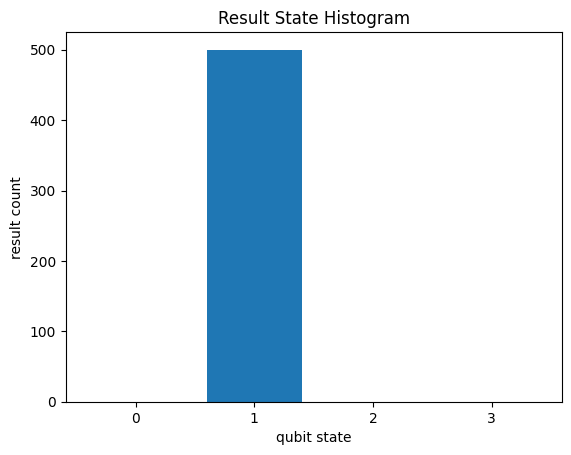

In [63]:
result4 = simulator.run(circuit4, repetitions=500)
cirq.plot_state_histogram(result4)

In [64]:
# Converting the X-axis values to binary and changing the title and x-label

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Circuit #4'}, xlabel='Measurement Outcome', ylabel='result count'>

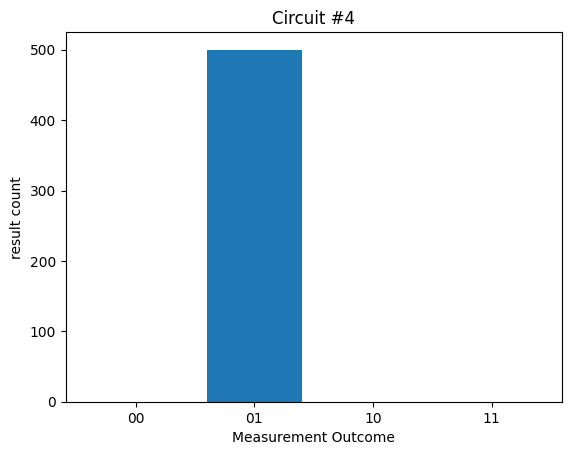

In [65]:
result4 = simulator.run(circuit4, repetitions=500)
cirq.plot_state_histogram(result4, tick_label=get_binary_list(2), xlabel='Measurement Outcome', title="Circuit #4")

### Circuit 5 in Cirq

Insert code starting on the following line

In [66]:
circuit5 = cirq.Circuit()
qubits5 = cirq.LineQubit.range(3)

circuit5.append(cirq.H(qubits5[0]))
circuit5.append(cirq.S(qubits5[0]).controlled_by(qubits5[1]))
circuit5.append(cirq.S(qubits5[0]).controlled_by(qubits5[2]))
circuit5.append(cirq.H(qubits5[1]))
circuit5.append(cirq.S(qubits5[1]).controlled_by(qubits5[2]))
circuit5.append(cirq.H(qubits5[2]))
circuit5.append(cirq.SWAP((qubits5[0]),(qubits5[2])))
circuit5.append(cirq.measure(qubits) for qubits in qubits5 )

print("Circuit #5 by Cirq:\n")
print(circuit5)

Circuit #5 by Cirq:

                  ┌──────┐
0: ───H───@────────@─────────────────────×───M───
          │        │                     │
1: ───────@^0.5────┼────H────@───────M───┼───────
                   │         │           │
2: ────────────────@^0.5─────@^0.5───H───×───M───
                  └──────┘


C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

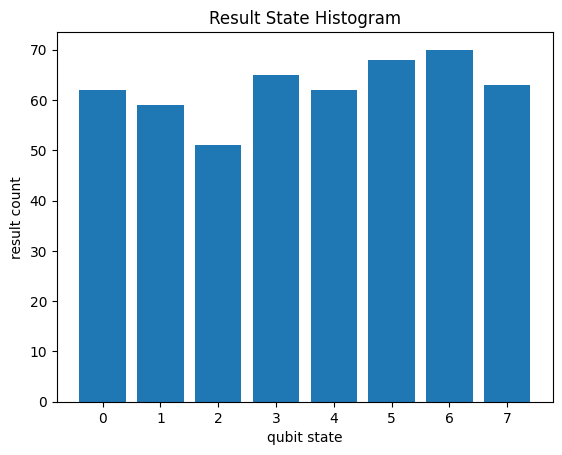

In [67]:
result5 = simulator.run(circuit5, repetitions=500)
cirq.plot_state_histogram(result5)

In [68]:
# Converting the X-axis values to binary and changing the title and x-label

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Circuit #5'}, xlabel='Measurement Outcome', ylabel='result count'>

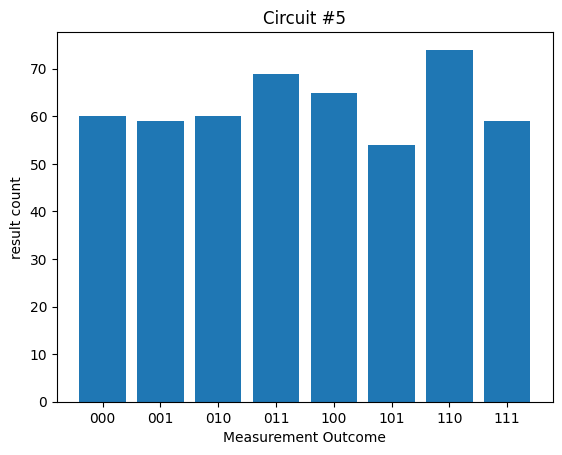

In [69]:
result5 = simulator.run(circuit5, repetitions=500)
cirq.plot_state_histogram(result5, tick_label=get_binary_list(3), xlabel='Measurement Outcome', title="Circuit #5")

In [70]:
# Rotation of x-axis values for 90 degrees

C:\Users\shahram\Project\qiskit\Lib\site-packages\cirq\vis\state_histogram.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


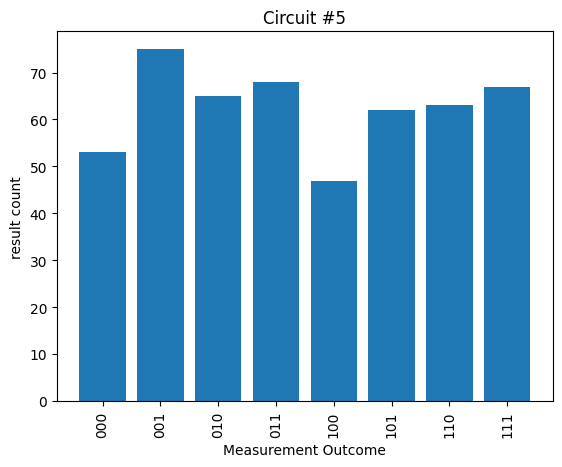

In [71]:
result5 = simulator.run(circuit5, repetitions=500)
cirq.plot_state_histogram(result5, tick_label=get_binary_list(3), xlabel='Measurement Outcome', title="Circuit #5").tick_params(axis='x',labelrotation=90)